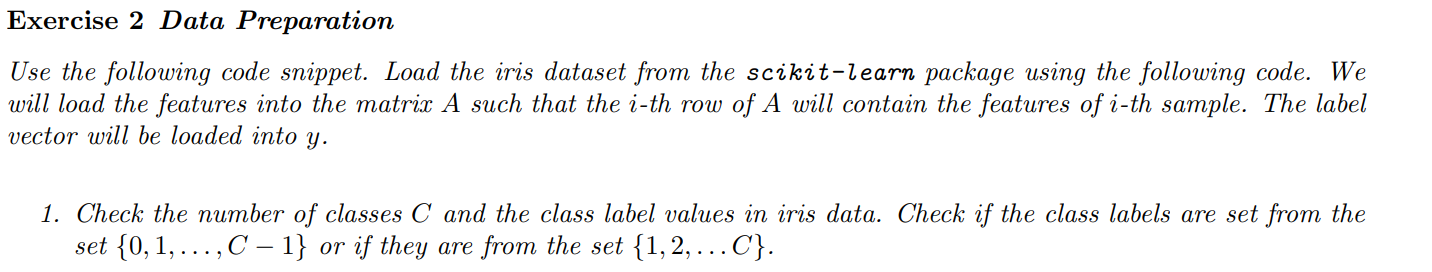

In [ ]:
import numpy as np
#we will load the iris data from scikit - learn package
from sklearn . datasets import load_iris
iris = load_iris ()
# check the shape of iris data
print ( iris . data . shape )
A = iris.data
# check the shape of iris target
print ( iris.target.shape )
print
#How many labels does iris data have ?
#Number of labels
C= np.unique(iris.target)
print('labels;',C)
print ('Number of lablels:',len(C))



(150, 4)
(150,)
labels; [0 1 2]
Number of lablels: 3


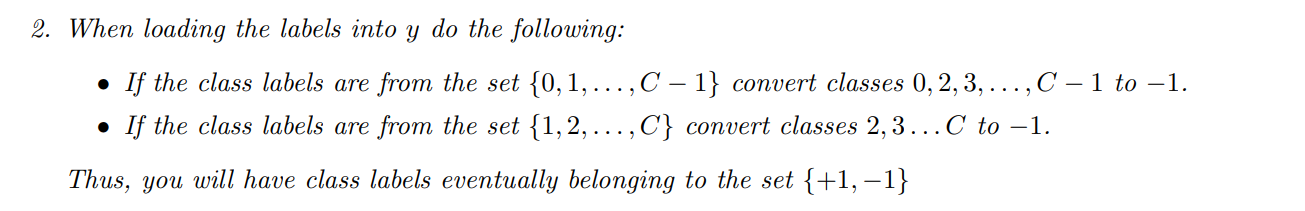

In [ ]:
n = iris . data . shape [0] # Number of data points
d = iris . data . shape [1] # Dimension of data points
#In the following code , we create a nx1 vector of target labels
y = 1.0* np . ones ([ A . shape [0] ,])

for i in range ( iris . target . shape [0]) :
  if iris.target[i] != 1:
    y[i]=-1
  else:
    y[i]=1
print(y)
# y[i] = ???? # Convert class labels that are not 1 into -1


[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.]


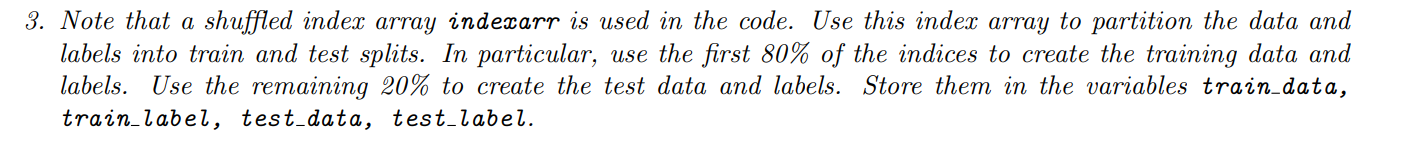

In [ ]:
# Create an index array
indexarr = np . arange ( n ) # index array

np . random . shuffle ( indexarr ) # shuffle the indices

# check indexarr after shuffling
print('index_array:',indexarr)
B=[[] for _ in range(150)]
Y=1.0* np . ones ([ A . shape [0] ,])
#Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
for i in range(A.shape[0]):
  j=indexarr[i]
  B[i]=A[j].tolist()
  Y[i]=y[j]

# train_label=1.0*np.ones([120])
# test_label=1.0*np.ones([30])
# train_data=[[] for _ in range(120)]
# test_data=[[] for _ in range(30)]
# print(train_data))
# for i in range(150):
#   if i<120:
#     train_data[i]=(A[indexarr[i]])
#     train_label[i]=y[indexarr[i]]
#   if i>=120:
#     test_label[i-120]=y[indexarr[i]]
#     test_data[i-120]=(A[indexarr[i]])
train_data=np.array(B[:120])
test_data=np.array(B[120:])
train_label=Y[:120]
test_label=Y[120:]
print(f'train_data: {train_data.shape}')
print(f'train_label: {train_label.shape}')
print(f'test_data: {test_data.shape}')
print(f'test_label: {test_label.shape}')

index_array: [ 74  41 129  64  26  13  62  53 101  40  56  39  38  31  77 145  94 103
  87 136  89  22  66  80  57  47 134   2 132  90  58  61 116  15 126 108
  14  69 135  82  97 112  75  95 121  65  88 118  71  32   5   1  24  48
 139  12  73 138  29  59 149  36 117   3  72  18 137 130  42 100  46  21
 115 110  20  37 107 105  55  16 146 122  85  30   6 131 114   7 144  43
  19  70  25  76  99 125 119  51 102  52  28  27 111   0   4 141 140  83
  93  49  84  81  45 120 127 106  50  63  54 133  86 113  33  34 124 123
 143  35  96  78  91 128 109  23   9  98  60  68  17 147  67  79  11 142
 148  92  10 104  44   8]
train_data: (120, 4)
train_label: (120,)
test_data: (30, 4)
test_label: (30,)


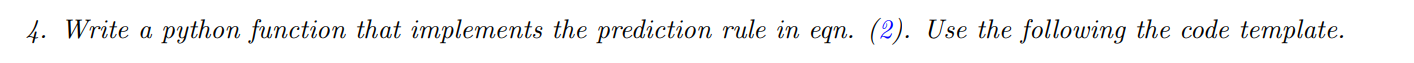

In [ ]:
def predict(w,x):
  predict=[]
  for i in range(x.shape[0]):
    wx=w@x[i]
    a=(np.sign(wx))
    if a>=0:# assumption: we assume for 0 it is 1 its depend on us that for which value we are biased
      predict.append(1)
    else:
      predict.append(-1)
  return predict

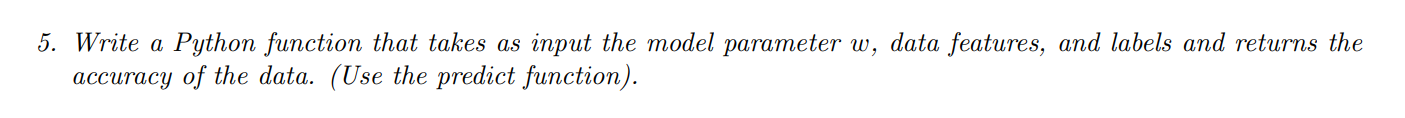

In [ ]:
def compute_accuracy(data,labels,model_w,lamda):
  predicted_value=predict(model_w,data)
  count_true=0
  count_false=0
  for i in range(len(labels)):
    if predicted_value[i] == labels[i]:
      count_true+=1
    else:
      count_false+=1
  accuracy=(count_true/len(labels))
  return accuracy
